In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
img = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)

In [2]:
def custom_hist_equalization(image):
    # Compute histogram
    hist, bins = np.histogram(image.flatten(), bins=256, range=[0, 256])
    
    # Compute cumulative distribution function (CDF)
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255 / cdf[-1]  # Normalize to range [0, 255]
    
    # Map original pixel values to equalized values
    equalized = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    
    return equalized.reshape(image.shape).astype(np.uint8)


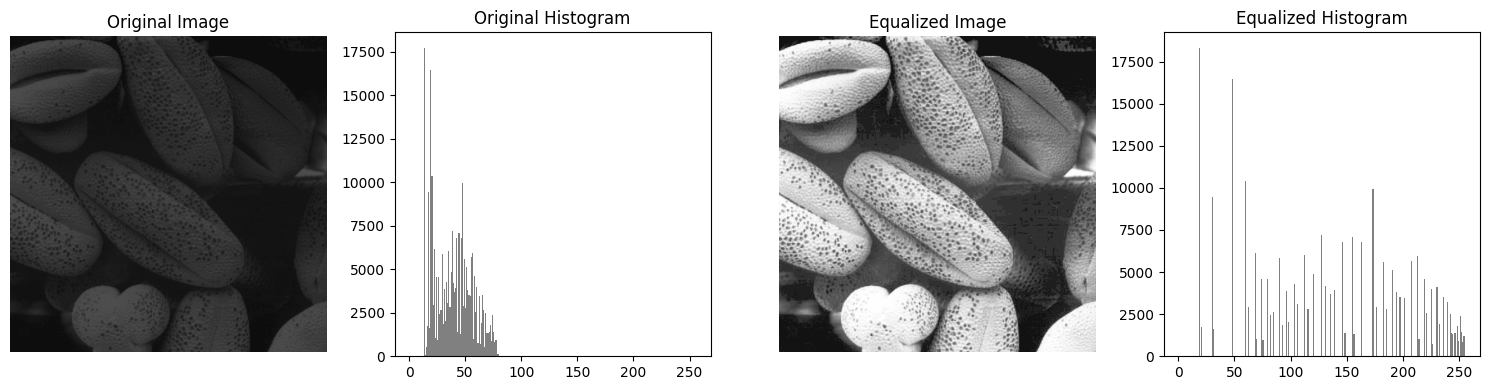

In [7]:
# Apply custom histogram equalization
equalized_img = custom_hist_equalization(img)

# Plot images and histograms
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

img_flatten = img.flatten()
equalized_img_flatten = equalized_img.flatten()

axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[2].imshow(equalized_img, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Equalized Image')
axs[2].axis('off')

axs[1].hist(img_flatten, bins=256, range=[0, 256], color='gray')
axs[1].set_title('Original Histogram')

axs[3].hist(equalized_img_flatten, bins=256, range=[0, 256], color='gray')
axs[3].set_title('Equalized Histogram')

plt.tight_layout()
plt.show()